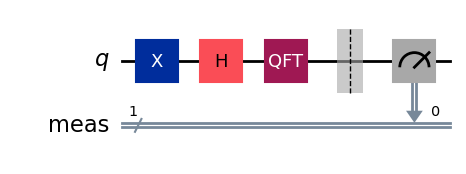

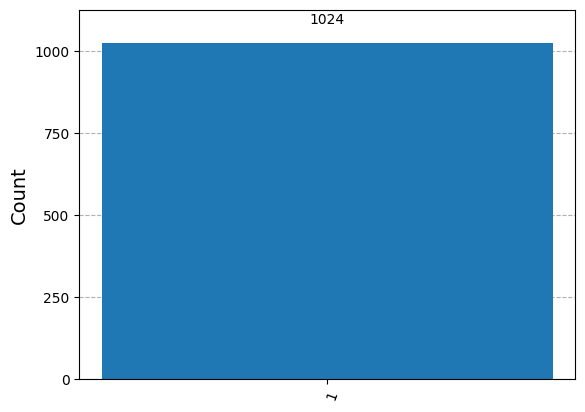

Dominant state: 1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
%matplotlib inline

# Initialize a quantum circuit with 3 qubits
num_qubits = 1
qc = QuantumCircuit(num_qubits)

# Prepare a superposition state (example: equal superposition)
qc.x(0)
qc.h(range(num_qubits))

# Apply Quantum Fourier Transform
qc.append(QFT(num_qubits, do_swaps=True), range(num_qubits))

# Measure the output state
qc.measure_all()

# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
qobj = assemble(transpiled_qc)
result = simulator.run(transpiled_qc).result()

# Get the measurement results
counts = result.get_counts()


# Draw the circuit
qc.draw(output='mpl')

# Plot the measurement results
plot_histogram(counts)
plt.show()

# Determine the dominant frequency, fold=30
dominant_frequency = max(counts, key=counts.get)
print(f"Dominant state: {dominant_frequency}")


Loaded signals shape: (40, 4096)
Loaded labels shape: (40,)


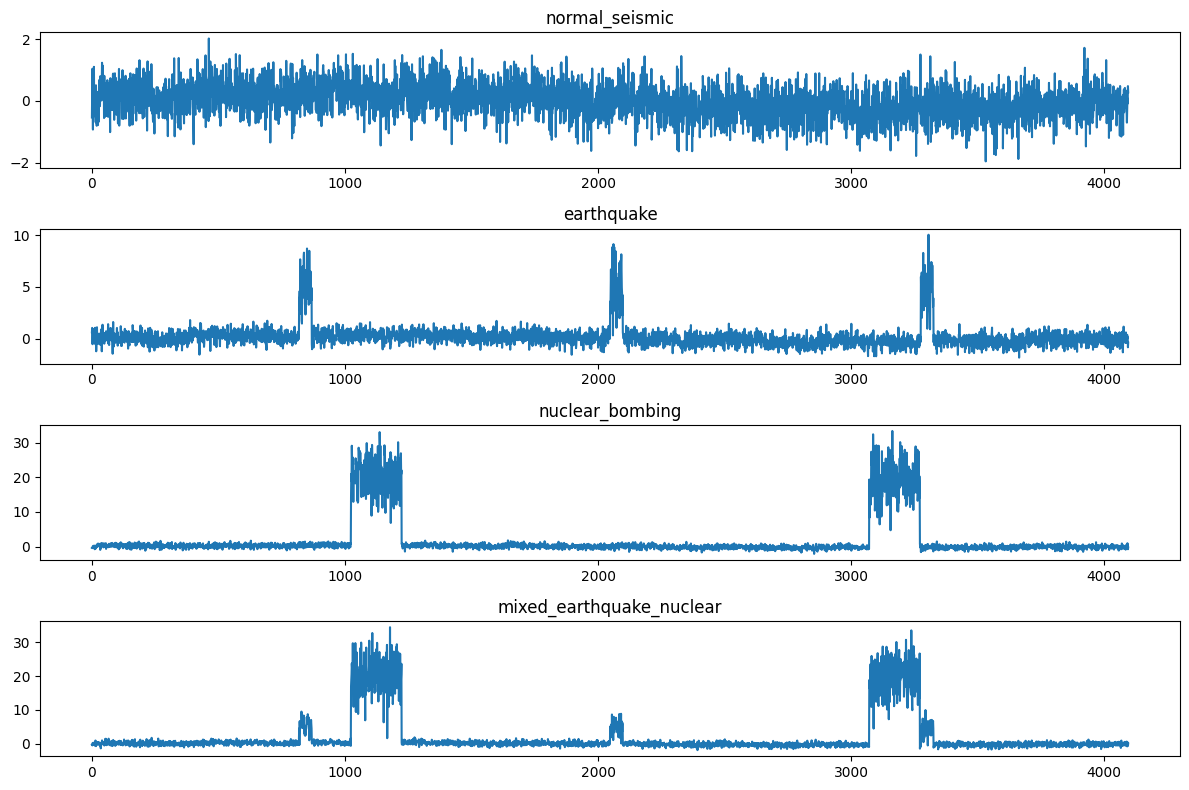

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a raw seismic signal with natural noise
def generate_normal_seismic(sampling_rate, duration):
    time = np.linspace(0, duration, duration * sampling_rate)
    low_freq_noise = 0.3 * np.sin(2 * np.pi * 1 * time)
    medium_freq_noise = 0.1 * np.sin(2 * np.pi * 10 * time)
    high_freq_noise = 0.05 * np.sin(2 * np.pi * 20 * time)
    random_noise = np.random.normal(0, 0.5, time.shape)
    seismic_signal = low_freq_noise + medium_freq_noise + high_freq_noise + random_noise
    return seismic_signal

# Function to add earthquake effects
def add_earthquake_effects(signal, sampling_rate, event_times):
    for event_time in event_times:
        event_index = int(event_time * sampling_rate)
        signal[event_index:event_index+50] += np.random.normal(5, 2, 50)
    return signal

# Function to add nuclear bombing effects
def add_nuclear_effects(signal, sampling_rate, event_times):
    for event_time in event_times:
        event_index = int(event_time * sreturnampling_rate)
        signal[event_index:event_index+200] += np.random.normal(20, 5, 200)
    return signal

# Parameters
sampling_rate = 4096  # samples per second
duration = 1  # seconds
n_signals = 40

# Generate signals
signals = []
labels = []

for i in range(n_signals):
    signal = generate_normal_seismic(sampling_rate, duration)
    if len(signal) != 4096:
        raise ValueError("Signal length is not 4096 samples")
    if i < 10:
        label = 'normal_seismic'
    elif i < 20:
        label = 'earthquake'
        event_times = [0.2, 0.5, 0.8]
        signal = add_earthquake_effects(signal, sampling_rate, event_times)
    elif i < 30:
        label = 'nuclear_bombing'
        event_times = [0.25, 0.75]
        signal = add_nuclear_effects(signal, sampling_rate, event_times)
    else:label = 'earthquake'
        event_times = signal = generate_normal_seismic(sampling_rate, duration)[0.2, 0.5, 0.8]
        signal = add_earthquake_effects(signal, sampling_rate, event_times)
        label = 'mixed_earthquake_nuclear'
        earthquake_times = [0.2, 0.5, 0.8]
        nuclear_times = [0.25, 0.        signal = add_nuclear_effects(signal, sampling_rate, nuclear_times)
75]
        signal = add_earthquake_effects(signal, sampling_rate, earthquake_times)
        signal = add_nuclear_effects(signal, sampling_rate, nuclear_times)
    
    signals.append(signal)
    labels.append(label)

# Create a dictionary for signals and labels
data_dict = {'signals': signals, 'labels': labels}

# Save the dictionary as a .npy file
np.save('seismic_data.npy', data_dict)

# Load the .npy file to verify
loaded_data = np.load('seismic_data.npy', allow_pickle=True).item()

# Verify the loaded data
print(f"Loaded signals shape: {np.array(loaded_data['signals']).shape}")
print(f"Loaded labels shape: {np.array(loaded_data['labels']).shape}")

# Plot sample signals
plt.figure(figsize=(12, 8))

# Plot a few samples from each category
categories = ['normal_seismic', 'earthquake', 'nuclear_bombing', 'mixed_earthquake_nuclear']
for i, category in enumerate(categories):
    plt.subplot(4, 1, i + 1)
    sample_signal = loaded_data['signals'][loaded_data['labels'].index(category)]
    plt.plot(sample_signal)
    plt.title(category)

plt.tight_layout()
plt.show()

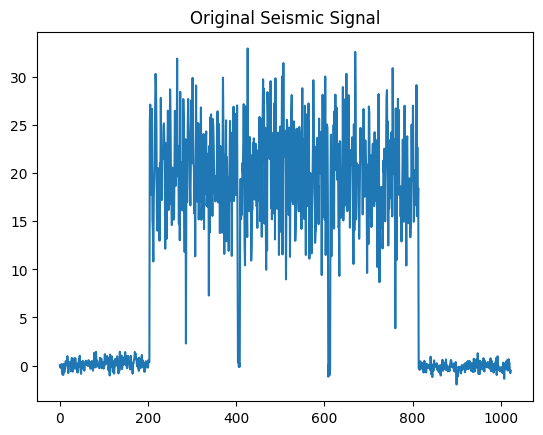

['111', '111', '111', '111', '111', '111', '111', '111', '111', '111']


In [48]:
signal = generate_normal_seismic(1024, duration)

event_times = [0.2, 0.4, 0.6]
#signal = add_earthquake_effects(signal, 1024, event_times)
signal = add_nuclear_effects(signal, 1024, event_times)


signal_normalized = signal / np.max(np.abs(signal))


# Define the 8 amplitude levels
levels = np.linspace(-1, 1, 8)

# Quantize the signal to the 8 levels
quantized_signal = np.digitize(signal_normalized, levels) - 1

# Map the quantized levels to 2's complement binary strings
def to_binary_2s_complement(value, bits):
    if value < 0:
        value = (1 << bits) + value
    format_string = '{:0' + str(bits) + 'b}'
    return format_string.format(value)

binary_signal = [to_binary_2s_complement(level - 4, 3) for level in quantized_signal]

# Plot the original signal
plt.plot(signal)
plt.title("Original Seismic Signal")
plt.show()

# Display the binary signal
print(binary_signal[:10])  # Display the first 10 binary strings for verification
    

In [45]:
def checkX(bit1, bit2, comp):
    b1 = int(bit1, 2)
    b2 = int(bit2, 2)
    
    xor = b1 ^ b2
    
    if comp:
        if xor:
            return 0
        else:
            return 1
    else:
        return xor

Dominant state: 1000000000000


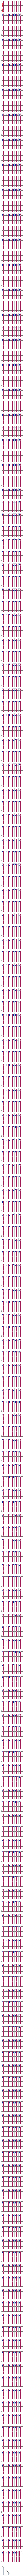

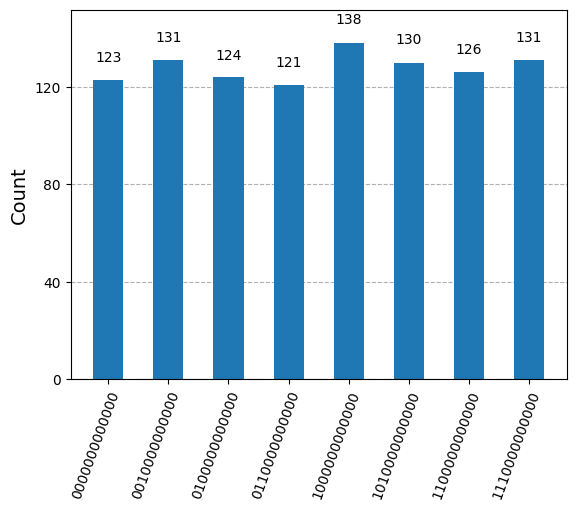

In [50]:
from qiskit.circuit.library import MCMT

#FRQA Implementation 
num_qubits = 13
qc = QuantumCircuit(num_qubits)

mcmt_gate = MCMT('cx', 10, 3)

for i in range(3, num_qubits):
    qc.h(i)

for b in binary_signal:
    for i in range(len(b)):
        if i == 0:
            if checkX('0', b[i], True):
                qc.x(i)
        else:
            if checkX('0', b[i], False):
                qc.x(i)
                
    qc.append(mcmt_gate, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 1, 2])
    
    for i in range(len(b)):
        if i == 0:
            if checkX('0', b[i], True):
                qc.x(i)
        else:
            if checkX('0', b[i], False):
                qc.x(i)
    
    qc.barrier()

#qc.append(mcmt_gate, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 1, 2])

# Draw the circuit
#circuit_diagram = qc.draw(output='mpl', scale=0.2)

# Save the circuit diagram as an image
#circuit_diagram.savefig('quantum_circuit.png')

qc.append(QFT(num_qubits, do_swaps=True), range(num_qubits))

# Measure the output state
qc.measure_all()

# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
qobj = assemble(transpiled_qc)
result = simulator.run(transpiled_qc).result()

# Get the measurement results
counts = result.get_counts()


# Draw the circuit
circuit_diagram = qc.draw(output='mpl', scale=0.2)

# Save the circuit diagram as an image
circuit_diagram.savefig('quantum_circuit.png')

# Plot the measurement results
hist = plot_histogram(counts)
hist.savefig('normal_seismic_qft.png')


# Determine the dominant frequency, fold=30
dominant_frequency = max(counts, key=counts.get)
print(f"Dominant state: {dominant_frequency}")


In [51]:
def get_fft_from_counts(counts, n_qubits):
    """
    Returns the counts in order of the digital value of the key which is the measured qbit state, i.e. in frequency order
    """
    out = []
    keys = counts.keys()
    for i in range(2**n_qubits):
        id = get_bit_string(i, n_qubits)
        if(id in keys):
            out.append(counts[id])
        else:
            out.append(0)

    return out

def get_bit_string(n, n_qubits):
    """
    Returns the binary string of an integer with n_qubits characters
    """

    assert n < 2**n_qubits, 'n too big to binarise, increase n_qubits or decrease n'

    bs = "{0:b}".format(n)
    bs = "0"*(n_qubits - len(bs)) + bs

    return bs

def plot_samples(samples,factor):

    n=len(samples)
    x = np.arange(n) 
    x=x*factor
    y = samples[0:n]
    plt.title("Frequency Distribution") 
    plt.xlabel("frequency") 
    plt.ylabel("counts") 
    plt.plot(x,y,"o") 
    plt.plot(x,y)

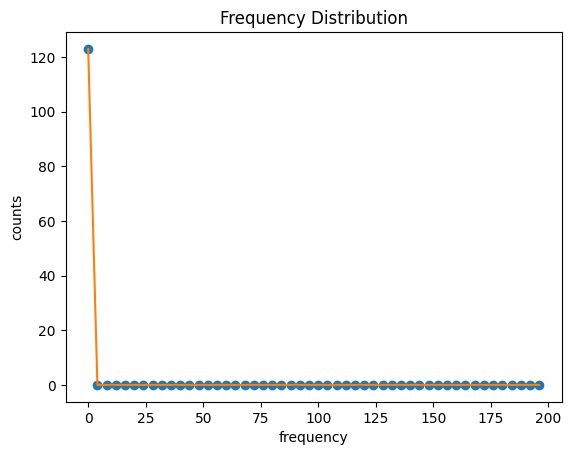

In [52]:
fft = get_fft_from_counts(counts, 13)[:1024//2]
plot_samples(fft[0:50],sampling_rate/1024)

In [57]:
import math
#Find the frequencies
max_value = max(fft)
max_index = fft.index(max_value)
detected_frequency = []
#find the indexes with counts larger than half the maximum count
for i in range(math.floor(len(fft)/2)):
    if fft[i] > max_value/2:
        detected_frequency.append(i)
#tunr the indices into frequencies by multiplying by sampling_rate/samples.size
for j in range(len(detected_frequency)):
    detected_frequency[j]=detected_frequency[j]*(sampling_rate/1024)

print(detected_frequency)


[0.0]


The dominant frequency is 0.0 Hz


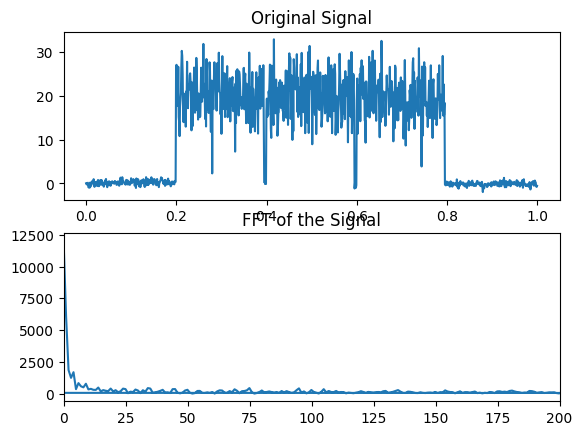

In [58]:
t = np.linspace(0, 1, 1024)
fft_result = np.fft.fft(signal)

# Compute the frequencies
frequencies = np.fft.fftfreq(len(signal), t[1] - t[0])

# Find the peak frequency
index_of_peak = np.argmax(np.abs(fft_result))
dominant_frequency = frequencies[index_of_peak]

print(f"The dominant frequency is {dominant_frequency} Hz")

# Plot the signal
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')

# Plot the FFT result
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('FFT of the Signal')
plt.xlim(0, 200)
plt.show()